# Importing Packages

In [1]:
import sys
import os
from pathlib import Path, PureWindowsPath, PurePosixPath
sys.path.append(
    os.path.abspath(r"C:\Users\anishjv\OneDrive - Michigan Medicine\Desktop\cellapp-analysis")
)
import cellaap_analysis
import cellaap_utils
import pandas as pd

Below we instantiate a instance of cellaap_analysis' analysis class. Instantiation requires two arguments. 
1. A directory containing the root folder where the inference folders are loctaed 
2. A boolean, indicating whether the instance will be used for analysis_only, i.e. plotting, or for signal measurement as well. 

In [2]:
root_folder = r"C:\Users\anishjv\OneDrive - Michigan Medicine\Desktop\for_analysis"
experiment1 = cellaap_analysis.analysis(Path(root_folder), analysis_only = False)

20250110_20250110-HeLa-pFF1_C01_s1_GFP_background_map.tif used as the GFP background map
20250110_20250110-HeLa-pFF1_D01_s1_GFP_intensity_map.tif used as the GFP intensity map


Here we create the background and flourescence intensity correction maps. It is recommended to create one map per wavelength of light. We provided a time-series taken from a well with DMEM only as 'GFP_intensity" and a time-series taken from a well with Flourobrite only as GFP_background. We currently support the usage of one intensity and one background map per root directory, which implies that one set of normalization maps will be used regardless of well position. 

In [3]:
map_dict = {
    'GFP_intensity': Path(r"C:\Users\anishjv\OneDrive - Michigan Medicine\Desktop\for_analysis\20250110_20250110-HeLa-pFF1_C01_s1_GFP.tif"),
    'GFP_background' : Path(r"C:\Users\anishjv\OneDrive - Michigan Medicine\Desktop\for_analysis\20250110_20250110-HeLa-pFF1_D01_s1_GFP.tif"), 
            }

experiment1.create_correction_maps(map_dict)

Intensity map saved in the data dir. as C:\Users\anishjv\OneDrive - Michigan Medicine\Desktop\for_analysis\20250110_20250110-HeLa-pFF1_C01_s1_GFP_intensity_map.tif
Background map saved in the data dir. as C:\Users\anishjv\OneDrive - Michigan Medicine\Desktop\for_analysis\20250110_20250110-HeLa-pFF1_D01_s1_GFP_background_map.tif


Here we measure the signal in each segmentation mask and track these masks through time. 

In [3]:
for inference_folder in [
    r"C:\Users\anishjv\OneDrive - Michigan Medicine\Desktop\for_analysis\test"
]:

    experiment1.files(Path(inference_folder), cell_type = "HeLa")
    experiment1.track_centroids(save_flag = True)
    tracks = experiment1.measure_signal('GFP', save_flag = True, id = -1)
    summary = experiment1.summarize_data(True)

Frame 49: 692 trajectories present.
Processing cell #3...
Processing cell #21...
Processing cell #23...
Processing cell #30...
Processing cell #37...
cell #37 not processed; in mitosis at start or end
Processing cell #38...
Processing cell #39...
Processing cell #40...
cell #40 not processed; in mitosis at start or end
Processing cell #44...
cell #44 not processed; in mitosis at start or end
Processing cell #46...
cell #46 not processed; in mitosis at start or end
Processing cell #50...
Processing cell #56...
cell #56 not processed; in mitosis at start or end
Processing cell #61...
cell #61 not processed; in mitosis at start or end
Processing cell #66...
Processing cell #71...
cell #71 not processed; in mitosis at start or end
Processing cell #72...
cell #72 not processed; in mitosis at start or end
Processing cell #76...
Processing cell #80...
Processing cell #81...
Processing cell #93...
Processing cell #94...
Processing cell #95...
Processing cell #105...
Processing cell #106...
Pro

ValueError: All arrays must be of the same length

In [5]:
well_pos_list = ["A01_s1", "A01_s2", "B01_s1", "B01_s2"]
compiled_data = experiment1.gather_plot_summaries(well_pos_list)

A01_s1 loaded
A01_s2 loaded
B01_s1 loaded
B01_s2 loaded


In [6]:
dose_response = compiled_data.loc[:, ('mitosis', 'GFP')]
dose_response.GFP = dose_response.GFP - dose_response.GFP.min()

C:\Users\anishjv\OneDrive - Michigan Medicine\Desktop\cellapp-analysis\cellaap_utils.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = xy_data.groupby("bins").mean()
C:\Users\anishjv\OneDrive - Michigan Medicine\Desktop\cellapp-analysis\cellaap_utils.py:154: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_sizes = xy_data.groupby("bins").size()
C:\Users\anishjv\OneDrive - Michigan Medicine\Desktop\cellapp-analysis\cellaap_utils.py:155: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

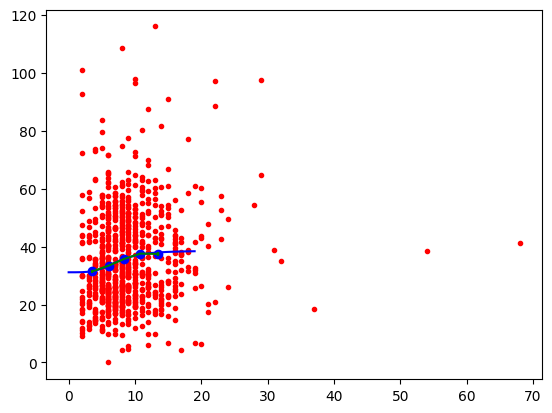

In [ ]:
xy_data, bin_means, bin_stderrs, fit_values = cellaap_utils.fit_model(dose_response, plot= True, quant_fraction = [0.025, 0.85], bin_size = 2.5)